# Segmentation using Devbio


## On the VSC, load the modules:

**_NOTE:_**  to find a module X, use ` module av |& grep -i x`

We need the follwing module

```bash
module load devbio-napari/0.10.1-foss-2022a
```

- More information of possibilities : https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/intro.html

In [2]:
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling, \
                                                           seeded_watershed, \
                                                           local_minima_seeded_watershed
from skimage.io import imread
from skimage.filters import gaussian
from skimage import data
from pyclesperanto_prototype import imshow
from skimage.segmentation import clear_border


In [3]:
cells = data.cells3d()
cells.shape

(60, 2, 256, 256)

c:\Users\u0094799\.conda\envs\devbio-napari-env\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


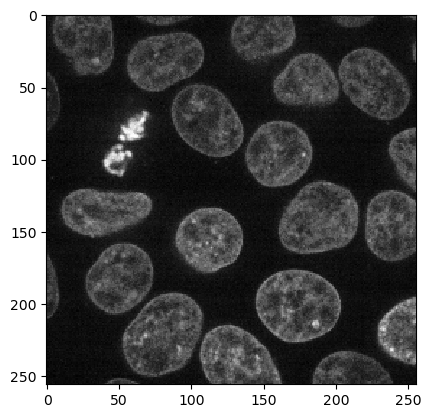

In [3]:
nuclei_channel = cells[30, 1]
imshow(nuclei_channel)

c:\Users\u0094799\.conda\envs\devbio-napari-env\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


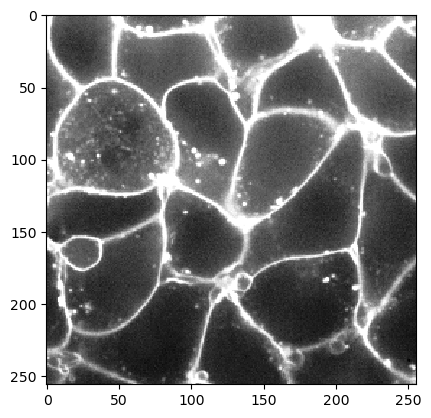

In [4]:
membrane_channel = cells[30, 0]

imshow(membrane_channel, max_display_intensity=6000)

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
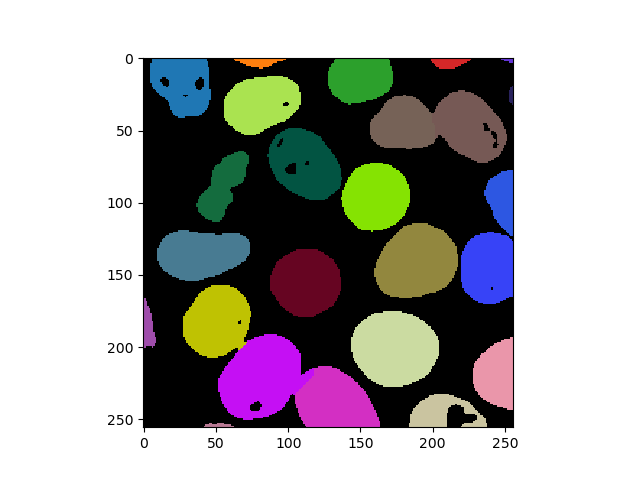

In [5]:
labeled_nuclei = voronoi_otsu_labeling(nuclei_channel, spot_sigma=10, outline_sigma=2)
labeled_nuclei

StackViewNDArray([[ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  ...,
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25]])
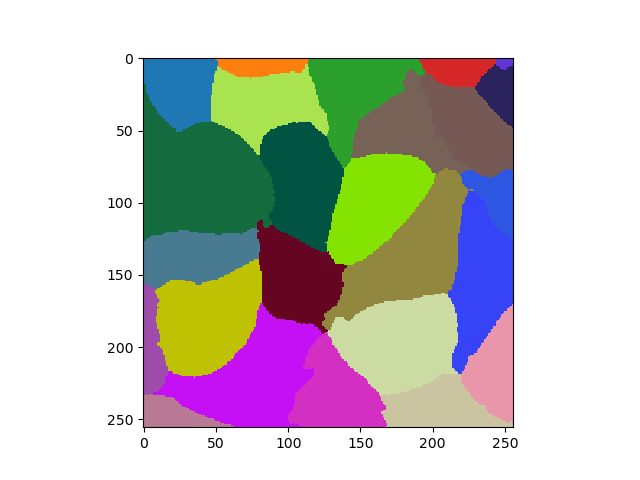

In [6]:
blurred = gaussian(membrane_channel, sigma=3)
labeled_cells = seeded_watershed(blurred, labeled_nuclei)
labeled_cells

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27]])
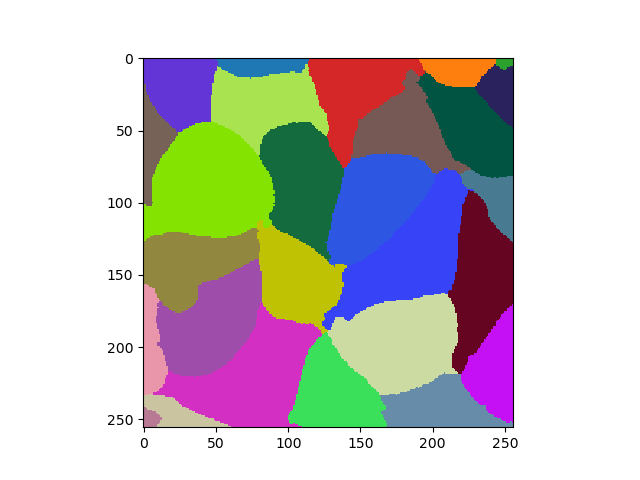

In [8]:
labeles_cells2 = local_minima_seeded_watershed(blurred)
labeles_cells2

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27]])
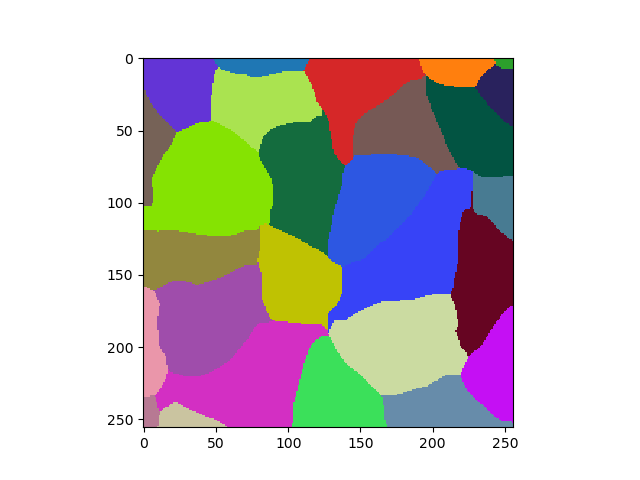

In [9]:
labeles_cells3 = local_minima_seeded_watershed(
                      membrane_channel, 
                      outline_sigma=3)
labeles_cells3

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [26, 26, 26, ..., 28, 28, 28],
                  [26, 26, 26, ..., 28, 28, 28],
                  [26, 26, 26, ..., 28, 28, 28]])
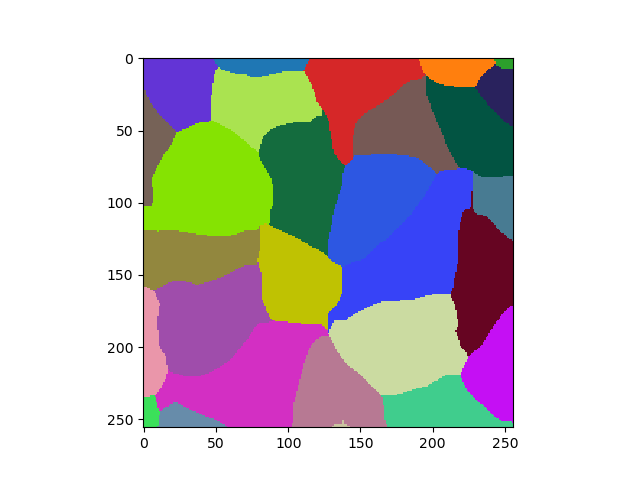

In [14]:
labels_cells4 = local_minima_seeded_watershed(
                       membrane_channel, 
                       spot_sigma=9, 
                       outline_sigma=3)
labels_cells4

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
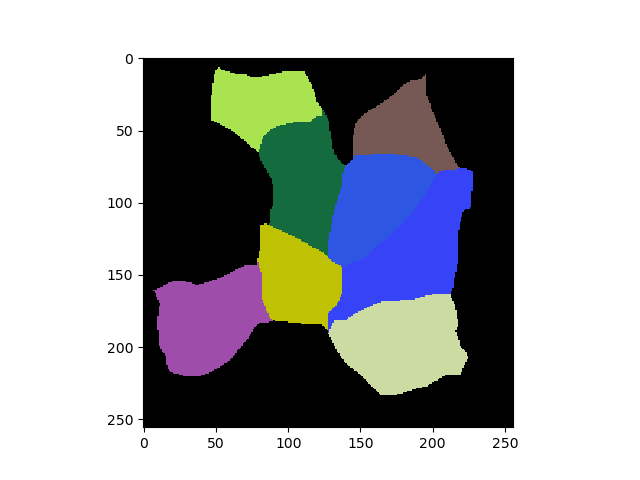

In [15]:
labels_cells_cleaned = clear_border(labels_cells4)
labels_cells_cleaned

## Feature extraction

In [1]:
# analyse objects
